# Debugging and visualizing data

In [11]:
import argparse
import numpy as np
import matplotlib.pyplot as plt

from popularity import PopularityRecommender
from content import ContentFiltering
from main import rec_dict, rec_args, debug_opt
from debug import Debug

### A few details on the available debugging options
- `'MEASUREMENTS'` is used to debug the `measurements` module. Right now, if enabled, it only supports plotting the distribution of interactions at a given timestep. It is possible to define a `measurement_visualization_rule` to plot the distribution -- see example below.
- `USER_PREFERENCES` is used to debug the `user_preferences` module. If enabled, it plots the distribution of the most liked items at the beginning of the execution.
- `RECOMMENDER` is used to debug the behavior of the recommender system.

In [2]:
# NOTE: Restart kernel before re-running this

# Set up debug options (see debug_opt in main.py)
debug_opt['MEASUREMENTS'] = False # debug measurement of equilibrium
debug_opt['USER_PREFERENCES'] = True  # debug user preferences
debug_opt['RECOMMENDER'] = True # debug recommender system
# Configure and initialize debugger
debugger = Debug(list(debug_opt.keys()), list(debug_opt.values()))

USER_PREFERENCES - Debugging module inizialized
RECOMMENDER - Debugging module inizialized


### Set up recommender system
This cell contains everything needed for setup.

In [9]:
# Set up the following
RECSYS_TYPE = 'content' # choose from supported (see rec_dict in main.py)
NUM_USERS = 5
NUM_ITEMS_PER_ITER = 2  # num items presented to each user at each iteration
STARTUP_TIMESTEPS = 2  # num iterations of 'exploration'
RUN_TIMESTEPS = 3  # total num iterations
NUM_ITEMS = 10#round((STARTUP_TIMESTEPS + RUN_TIMESTEPS) * NUM_ITEMS_PER_ITER * np.random.uniform(1, 5))  # total num items in simulation

# Set up additional arguments (see rec_args[RECSYS_TYPE] in main.py for supported arguments)
# A: number of attributes; items_representation: attributes of each item
rec_args['content']['A'] = 5
rec_args['content']['items_representation'] = np.zeros((NUM_ITEMS, rec_args['content']['A']))

# For content filtering, generate array of attributes
for i, row in enumerate(rec_args['content']['items_representation']):
    A = rec_args['content']['A']
    n_indices = np.random.randint(1, A)
    indices = np.random.randint(A, size=(n_indices))
    row[indices] = 1
    rec_args['content']['items_representation'][i,:] = row
# Add it to args
rec_args['content']['items_representation'] = rec_args['content']['items_representation'].T

# Check RECSYS_TYPE
if RECSYS_TYPE not in rec_dict:
    raise ValueError("Recommender system type not supported. Supported types: " + ', '.join(rec_dict))

### Instantiate and run

USER_PREFERENCES - Plot: Histogram of users liking each item the most


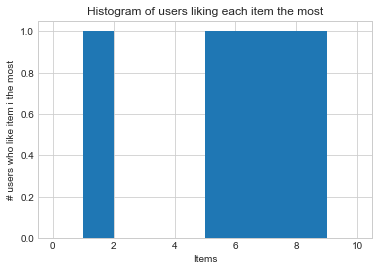

RECOMMENDER - Recommender system ready
RECOMMENDER - Num items: 10
RECOMMENDER - Users: 5
RECOMMENDER - Items per iter: 2
RECOMMENDER - Actual scores given by users (rows) to items (columns), unknown to system:
[[5.96 1.25 0.84 5.44 1.71 2.45 0.82 10.61 0.86 7.03]
 [2.01 3.18 0.74 0.68 5.38 5.48 9.68 4.75 1.24 2.49]
 [4.34 0.67 4.95 0.69 1.31 8.18 4.45 6.08 0.63 2.79]
 [2.85 9.30 4.03 2.76 6.55 6.17 5.96 1.39 9.15 5.74]
 [4.77 1.71 6.06 7.07 4.34 2.93 0.72 2.85 9.18 1.76]]
RECOMMENDER - Type of recommendation system: content
RECOMMENDER - Num attributes: 5
RECOMMENDER - Attributes of each item (rows):
[[1.00 0.00 1.00 1.00 0.00]
 [1.00 0.00 1.00 0.00 1.00]
 [0.00 0.00 1.00 0.00 0.00]
 [1.00 0.00 0.00 0.00 1.00]
 [1.00 1.00 0.00 1.00 0.00]
 [1.00 1.00 0.00 0.00 0.00]
 [0.00 1.00 0.00 0.00 1.00]
 [0.00 0.00 1.00 1.00 1.00]
 [1.00 0.00 1.00 0.00 0.00]
 [0.00 0.00 1.00 0.00 0.00]]
RECOMMENDER - User profiles known to the system represented by their attributes:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0

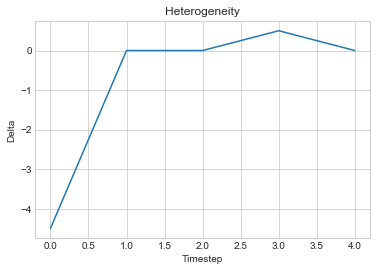

In [10]:
# Create recsys instance
if rec_args[RECSYS_TYPE] is None:
    rec = rec_dict[RECSYS_TYPE](NUM_USERS, NUM_ITEMS,
        num_items_per_iter=NUM_ITEMS_PER_ITER, randomize_recommended=True, user_preferences=True,
        debugger=debugger)
else:
    rec = rec_dict[RECSYS_TYPE](NUM_USERS, NUM_ITEMS,
        num_items_per_iter=NUM_ITEMS_PER_ITER, randomize_recommended=True, user_preferences=True, 
        debugger=debugger, **rec_args[RECSYS_TYPE])

# Startup
rec.startup_and_train(timesteps=STARTUP_TIMESTEPS, measurement_visualization_rule=False)

# Runtime
rec.run(timesteps=RUN_TIMESTEPS, train_between_steps=True, measurement_visualization_rule="%50 == 0")

delta_t = rec.get_heterogeneity()

In [12]:
# Run  a single step
rec.run(timesteps=1, train_between_steps=True, measurement_visualization_rule="%50 == 0")

RECOMMENDER - Run -- interleave recommendation and random items from now on
RECOMMENDER - Step 0
RECOMMENDER - System picked these items (cols) randomly for each user (rows):
[[8]
 [7]
 [8]
 [3]
 [1]]
RECOMMENDER - System recommended these items (cols) to each user (rows):
[[8]
 [0]
 [9]
 [9]
 [6]]
USER_PREFERENCES - User scores for given items are:
[[0.86 0.86]
 [4.75 2.01]
 [0.63 2.79]
 [2.76 5.74]
 [1.71 0.72]]
RECOMMENDER - Users choose the following items respectively:
[8 7 9 9 1]
RECOMMENDER - System updates user profiles based on last interaction:
[[4 1 5 3 2]
 [3 2 4 2 3]
 [2 2 3 1 3]
 [3 3 3 1 2]
 [5 2 4 2 1]]
RECOMMENDER - System updates predicted scores given by users (rows) to items (columns):
[[0.18 0.17 0.08 0.09 0.12 0.08 0.05 0.15 0.14 0.08]
 [0.14 0.15 0.06 0.09 0.11 0.08 0.08 0.14 0.11 0.06]
 [0.09 0.12 0.05 0.08 0.08 0.06 0.08 0.11 0.08 0.05]
 [0.11 0.12 0.05 0.08 0.11 0.09 0.08 0.09 0.09 0.05]
 [0.17 0.15 0.06 0.09 0.14 0.11 0.05 0.11 0.14 0.06]]


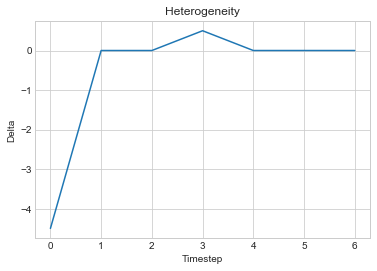

In [15]:
# Check heterogeneity again
delta_t = rec.get_heterogeneity()